- [Heatmap](#Heatmap)
    - [Entendendo os dados](#Entendendo-os-dados)
    - [Visualizando o heatmap](#Visualizando-o-heatmap)
    - [Eu poderia](#Eu-poderia)

# Heatmap

## Understanding the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

I have some data that describes locations of touches on ball for each player in matches from Campeonato Brasileiro 2020. The players are from Corinthians, São Paulo and Flamengo.

In [2]:
cor = pd.read_csv('data/corinthians-heatmap-data.csv')
fla = pd.read_csv('data/flamengo-heatmap-data.csv')
sao = pd.read_csv('data/saopaulo-heatmap-data.csv')

cor.head()

,match,player,X,Y
0,Corinthians x Atlético GO,Cássio,3,53
1,Corinthians x Atlético GO,Cássio,11,63
2,Corinthians x Atlético GO,Cássio,13,19
3,Corinthians x Atlético GO,Cássio,4,50
4,Corinthians x Atlético GO,Cássio,4,50


The soccer field is represented by a 2D plan, being 𝑥>50 the adversary area and 𝑦>50 the left side of the field.

Looking at some data below, we can see that, for example, Filipe Luís is the player that had most touches for Flamengo.

In [48]:
fla['player'].value_counts().head()

F. Luís            3367
Gerson             2817
Willian Arão       2521
Everton Ribeiro    2446
M. Isla            2219
Name: player, dtype: int64

We also can visualize where was each Filipe Luís touch (remembering: being the adversary goal in the right side of the graph and the upper side being the left side of the field).

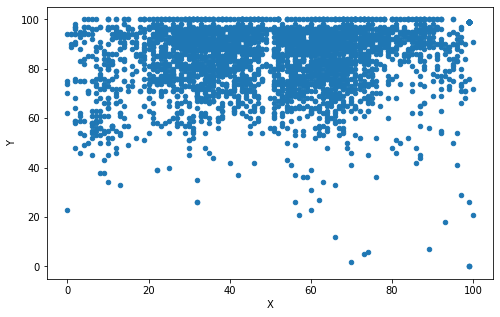

In [20]:
fla[fla['player'] == 'F. Luís'].plot.scatter('X', 'Y', figsize=(5*1.6, 5));

## Visualizing heatmap

No entanto, usar a visualização anterior não é muito interessante pois vários pontos são sobrepostos, então acabamos não tendo a capacidade de dizer o quanto uma área é mais visitada do que outra pelo jogador.

Pensando nisso, meu objetivo é dividir o campo em áreas e, dentro dessas áreas, observar mais facilmente qual a frequência do jogador, ou de um time inteiro. Basicamente um heatmap.

E é isso o que a minha função faz, dado um valor para `areas_by_axis`, ela exibe um heatmap do campo de futebol dividido em `areas_by_axis**2` regiões, onde cada região tem um valor para a frequência de toques dentro dela.

In [18]:
def plotHeatmap(data, areas_by_axis, figsize=5, **kwargs):
    def findYArea():
        for j in range(areas_by_axis):
            if (i*areas_size) <= x and x <= ((i+1)*areas_size)   and   (j*areas_size) <= y and y <= ((j+1)*areas_size):
                heatmap_df.at[areas_by_axis-j, chr(letter_code)] += 1
                return True
        return False
    
    index = [i+1 for i in range(areas_by_axis)]
    columns = [chr(65+i) for i in range(areas_by_axis)]
    heatmap_df = pd.DataFrame(index=index, columns=columns)
    heatmap_df.fillna(0, inplace=True)
    
    if kwargs.get('player'):
        mask = data['player'] == kwargs.get('player')
        data = data[mask]
    
    for index, row in data.iterrows():
        x, y = row['X'], row['Y']

        areas_size = 100/areas_by_axis
        letter_code = 64
        
        for i in range(areas_by_axis): # For each area in x axis
            letter_code += 1
            if findYArea():
                break
    
    max_value = kwargs.get('max_value')
    if not max_value:
        max_value = heatmap_df.max().max()
    
    fmt = 'd'
    
    if kwargs.get('annot') and kwargs.get('normalize') and not kwargs.get('max_value'):
        heatmap_df = heatmap_df/heatmap_df.sum().sum()
        max_value = None
        fmt = '.2f'
    
    labels = bool(kwargs.get('show_labels'))
    if labels:
        labels = 'auto'
    
    plt.figure(figsize=(figsize*1.6, figsize))
    sns.heatmap(heatmap_df, cmap='Blues', vmin=0, vmax=max_value, annot=kwargs.get('annot'), fmt=fmt,
                xticklabels=labels, yticklabels=labels)
    plt.show()

Heatmap do time inteiro do Corintihans no campeonato, dividido em 100 regiões: (Lembrando, sendo o lado direito o gol do adversário)

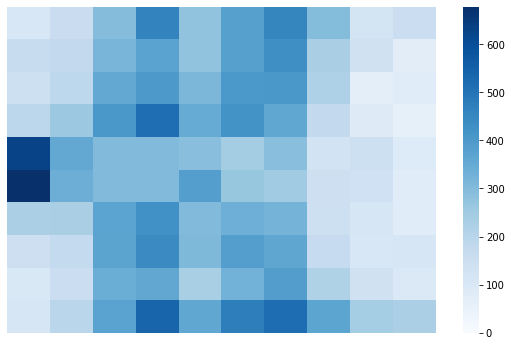

In [19]:
plotHeatmap(cor, 10, figsize=6)

Exibindo a quantidade de toques em cada região no time do Flamengo.

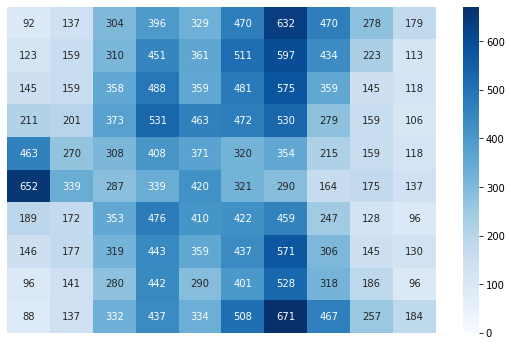

In [41]:
plotHeatmap(fla, 10, figsize=6, annot=True)

Os toques do Filipe Luís:

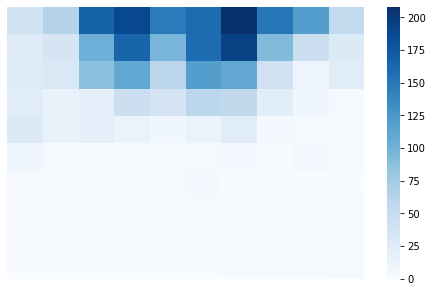

In [37]:
plotHeatmap(fla, 10, player='F. Luís')

Aumentando significamente a quantidade de regiões:

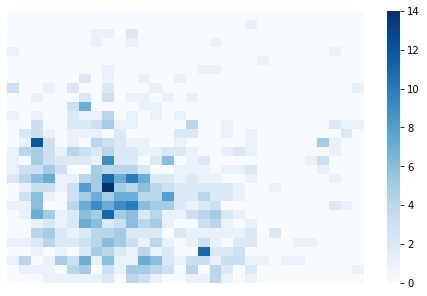

In [40]:
plotHeatmap(cor, 30, player='B. Méndez')

Normalizando a frequência nos toques de bola.

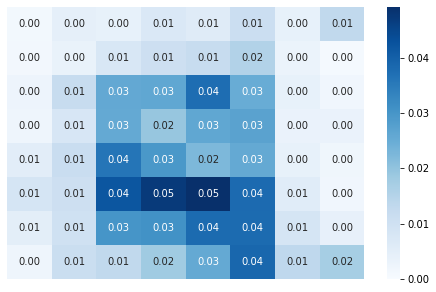

In [45]:
plotHeatmap(sao, 8, player='D. Alves', annot=True, normalize=True)

Comparando dois centroavantes, Gabriel do Flamengo e Jô do Corinthians, podemos ver que os toques na bola dados pelo Gabriel foram bem mais concentrados no lado direito do campo, camparados aos do Jô.

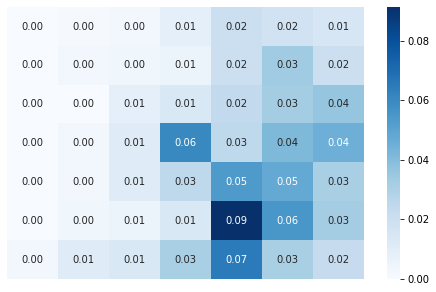

In [84]:
plotHeatmap(fla, 7, player='Gabriel', annot=True, normalize=True)

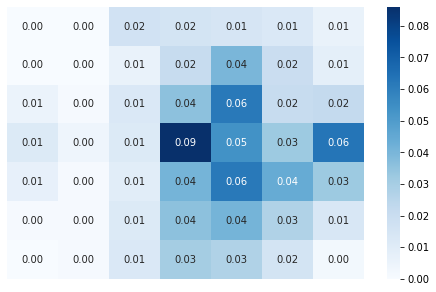

In [86]:
plotHeatmap(cor, 7, player='Jô', annot=True, normalize=True)

## Eu poderia

Eu poderia simplesmente usar `sns.kdeplot` para exibir os heatmaps, no entando, com `sns.heatmap` a visualização é mais simples, mais intuitiva e, principalmente, **mais fácil de comparar entre diferentes times ou jogadores**.

Abaixo dois exemplos usando `sns.kdeplot`.

(0.0, 100.0)

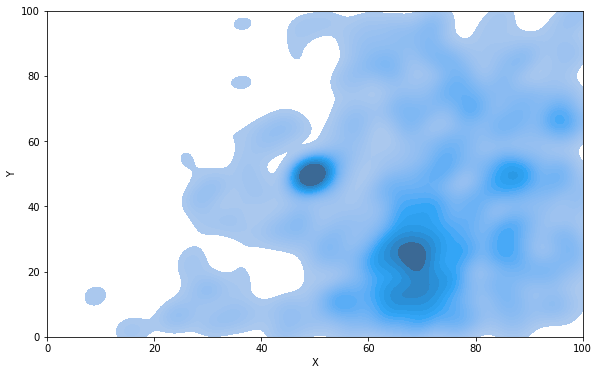

In [82]:
plt.figure(figsize=(6*1.6, 6))
sns.kdeplot(data=fla[fla['player'] == 'Gabriel'], x='X', y='Y', fill=True, levels=25, bw_adjust=0.4);
plt.xlim([0, 100])
plt.ylim([0, 100])

(0.0, 100.0)

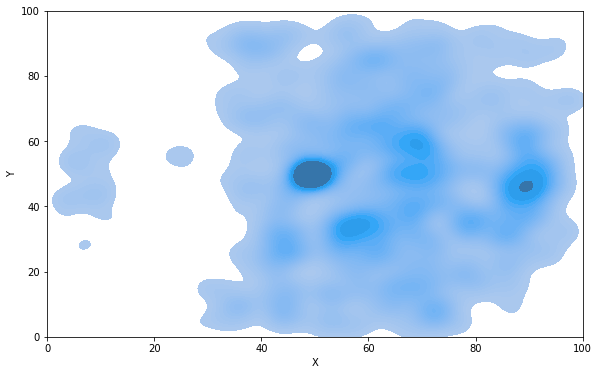

In [83]:
plt.figure(figsize=(6*1.6, 6))
sns.kdeplot(data=cor[cor['player'] == 'Jô'], x='X', y='Y', fill=True, levels=25, bw_adjust=0.4);
plt.xlim([0, 100])
plt.ylim([0, 100])